# Using object storage

[obstore](https://github.com/developmentseed/obstore) is a new, powerful Python library for getting from and putting to object storage.
**rustac** can use anything that implements `obstore.store.ObjectStore`, and also provides its own zero-dependency version in **rustac.store**.

100


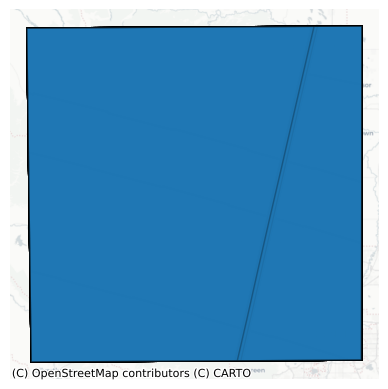

In [3]:
import contextily
import pandas
import rustac
from rustac.store import HTTPStore
from geopandas import GeoDataFrame

store = HTTPStore(
    "https://raw.githubusercontent.com/stac-utils/rustac-py/refs/heads/main/data"
)
items = await rustac.read("100-sentinel-2-items.parquet", store=store)
print(len(items["features"]))

data_frame = GeoDataFrame.from_features(items)
data_frame["datetime"] = pandas.to_datetime(data_frame["datetime"])
axis = data_frame.set_crs(epsg=4326).to_crs(epsg=3857).plot(alpha=0.5, edgecolor="k")
contextily.add_basemap(axis, source=contextily.providers.CartoDB.Positron)
axis.set_axis_off()

There's a whole set of provided object storage backends.
See <https://developmentseed.org/obstore/latest/authentication/> for how you might configure authenticate with those backends.

## Using **obstore.store.ObjectStore**.

If you're doing work with **obstore** directly, you can re-use the same `ObjectStore`.

In [4]:
from obstore.store import HTTPStore

store = HTTPStore(
    "https://raw.githubusercontent.com/stac-utils/rustac-py/refs/heads/main/data"
)
items = await rustac.read("100-sentinel-2-items.parquet", store=store)

/var/folders/yp/d6xvrkd943dgvqg5s9cpymc40000gn/T/ipykernel_65491/1946367820.py:4: RuntimeWarning: Successfully reconstructed a store defined in another Python module. Connection pooling will not be shared across store instances.
  items = await rustac.read("100-sentinel-2-items.parquet", store=store)


Notice how there's a warning?
That's because we have to copy the `ObjectStore` when we pass it in to **rustac**.
This means it can be a bit more efficient to use `rustac.store` if you're only working with **rustac**.